# Oil and Gas Stock Analysis

## Reliance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf

#### Loading Desired Data from Yahoo Finance.

In [2]:
rel = yf.download('RELIANCE.NS', start="2019-01-01", end="2023-12-30")
rel.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367676,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.763916,5565822


#### Cleaning Process.

In [3]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
rel.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,2045.456496,2066.902721,2022.358804,2043.660098,2028.197201,9.638454e+06
std,503.513169,505.980087,500.857582,503.521388,507.362584,7.431070e+06
min,907.596863,941.079529,867.427673,875.748779,864.012573,0.000000e+00
25%,1526.500000,1535.445557,1508.203735,1521.799866,1501.405701,5.236434e+06
50%,2203.500000,2228.000000,2177.550049,2201.699951,2180.746582,7.406104e+06
75%,2460.000000,2480.500000,2435.474976,2456.750000,2448.078247,1.114427e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,2831.846680,6.584835e+07


In [5]:
rel.rename(columns={"Adj Close": "price_t"}, inplace=True)
rel.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367676,7212697
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.763916,5565822


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [6]:
rel['daily_returns']=rel["price_t"].pct_change()
rel

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087,NaN
2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367676,7212697,-0.013024
2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041,-0.012337
2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382,0.005399
2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.763916,5565822,0.005552
...,...,...,...,...,...,...,...
2023-12-22,2559.600098,2580.899902,2547.649902,2565.050049,2565.050049,8270892,0.000976
2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,2578.050049,3732832,0.005068
2023-12-27,2582.000000,2599.899902,2573.100098,2586.850098,2586.850098,4602078,0.003413


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

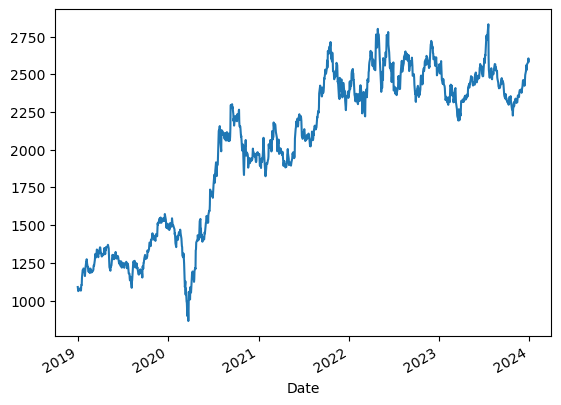

In [7]:
rel['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

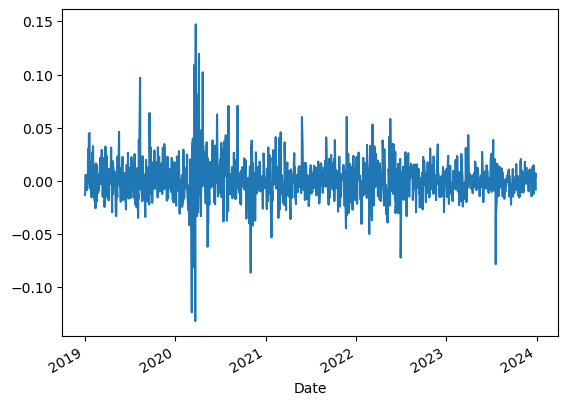

In [8]:
rel['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of Reliance is in the downtrend in early 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

#### Moving Average (30-day)

In [9]:
rel['mov_avg'] = rel['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

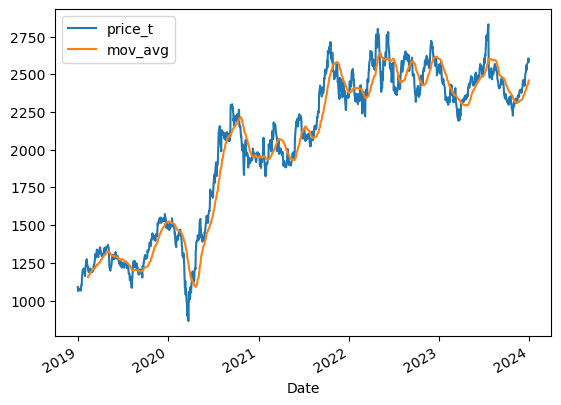

In [10]:
rel[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [11]:
rel['Log_Ret'] = np.log(rel['price_t'] / rel['price_t'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
rel['volatility'] = rel['Log_Ret'].rolling(window=30).std() * np.sqrt(30)


<Axes: xlabel='Date'>

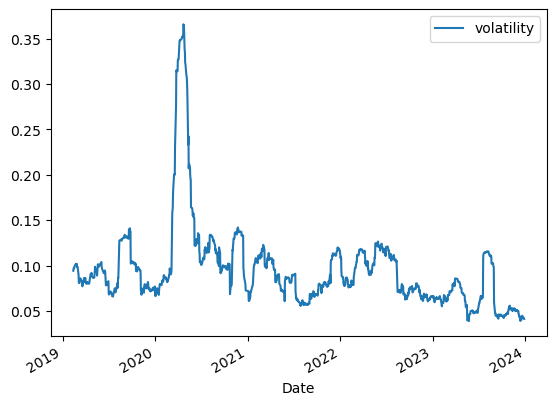

In [12]:
rel[['volatility']].plot()

#### RSI (30-day)

In [13]:
change = rel["price_t"].diff()
change.dropna(inplace=True)

In [14]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

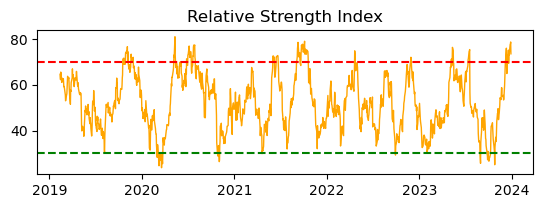

In [15]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## IOC

#### Loading Desired Data from Yahoo Finance.

In [16]:
ioc = yf.download('IOC.NS', start="2019-01-01", end="2023-12-30")
ioc.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,91.466667,92.000000,90.866669,91.800003,63.430412,6088843
2019-01-02,91.533333,92.133331,89.400002,91.500000,63.223133,17264659
2019-01-03,91.466667,91.466667,88.099998,88.433334,61.104176,19588744
2019-01-04,88.433334,89.966667,88.333336,89.300003,61.703007,10915804
2019-01-07,89.666664,89.833336,88.333336,88.966667,61.472691,15935205


#### Cleaning Process.

In [17]:
ioc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [18]:
ioc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,78.705438,79.645830,77.629797,78.566788,64.472681,2.198135e+07
std,15.510410,15.702999,15.288532,15.509633,15.958100,1.850942e+07
min,48.233334,48.933334,47.433334,47.700001,35.188034,0.000000e+00
25%,68.199997,68.900002,67.391666,68.091667,54.057154,1.135999e+07
50%,78.500000,79.250000,77.633331,78.366669,64.573914,1.742113e+07
75%,89.341667,90.300003,88.533333,89.300003,72.461464,2.653931e+07
max,129.699997,133.949997,128.300003,133.250000,133.250000,3.148937e+08


In [19]:
ioc.rename(columns={"Adj Close": "price_t"}, inplace=True)
ioc.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,91.466667,92.000000,90.866669,91.800003,63.430412,6088843
2019-01-02,91.533333,92.133331,89.400002,91.500000,63.223133,17264659
2019-01-03,91.466667,91.466667,88.099998,88.433334,61.104176,19588744
2019-01-04,88.433334,89.966667,88.333336,89.300003,61.703007,10915804
2019-01-07,89.666664,89.833336,88.333336,88.966667,61.472691,15935205


#### Calculate daily returns.

In [20]:
ioc['daily_returns']=ioc["price_t"].pct_change()
ioc

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,91.466667,92.000000,90.866669,91.800003,63.430412,6088843,NaN
2019-01-02,91.533333,92.133331,89.400002,91.500000,63.223133,17264659,-0.003268
2019-01-03,91.466667,91.466667,88.099998,88.433334,61.104176,19588744,-0.033516
2019-01-04,88.433334,89.966667,88.333336,89.300003,61.703007,10915804,0.009800
2019-01-07,89.666664,89.833336,88.333336,88.966667,61.472691,15935205,-0.003733
...,...,...,...,...,...,...,...
2023-12-22,124.250000,125.000000,122.099998,123.699997,123.699997,12915880,-0.003625
2023-12-26,123.900002,128.500000,123.599998,128.050003,128.050003,30770511,0.035166
2023-12-27,128.399994,128.899994,125.449997,126.599998,126.599998,16455934,-0.011324


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

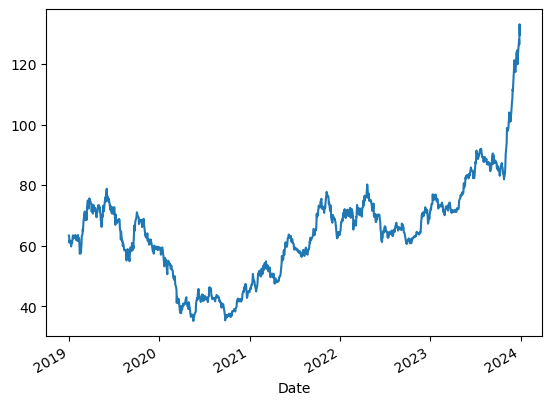

In [21]:
ioc['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

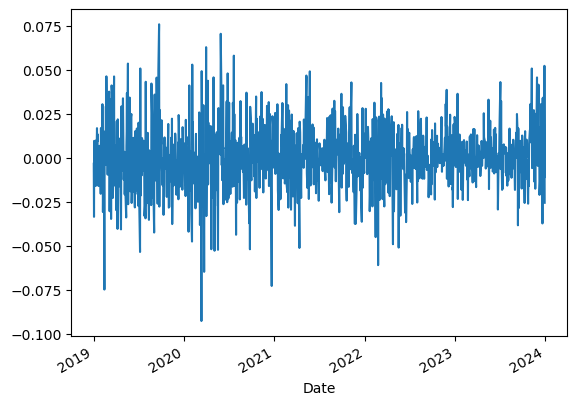

In [22]:
ioc['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of IOC is in the Uptrend in 2023 ending but the stock returns not showing a proper uptrend pattern. This means sometims the stock returns are unpredictable.

#### Moving Average (30-day)

In [23]:
ioc['mov_avg'] = ioc['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

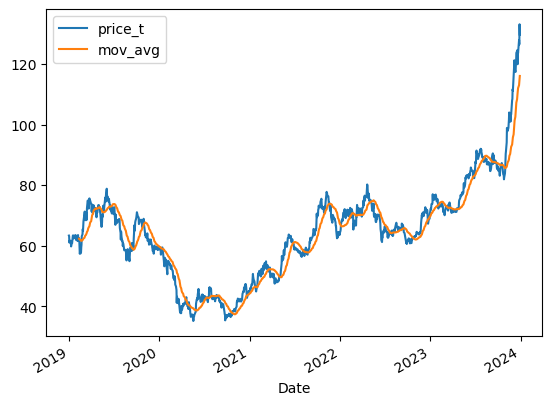

In [24]:
ioc[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [25]:
ioc['Log_Ret'] = np.log(ioc['price_t'] / ioc['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
ioc['volatility'] = ioc['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

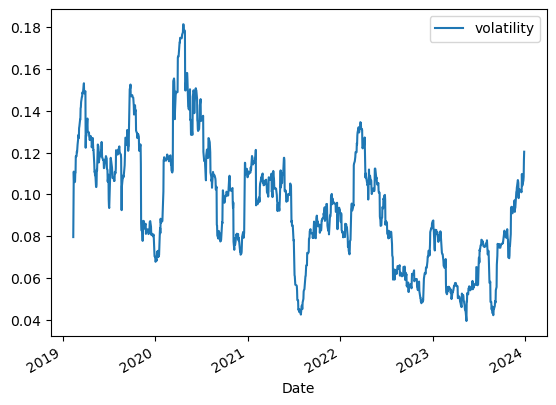

In [26]:
ioc[['volatility']].plot()

#### RSI (30-day)

In [27]:
change = ioc["price_t"].diff()
change.dropna(inplace=True)

In [28]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

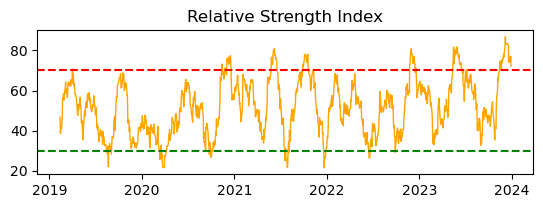

In [29]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Hindustan Petroleum

#### Loading Desired Data from Yahoo Finance

In [30]:
hp = yf.download('HINDPETRO.NS', start="2019-01-01", end="2023-12-30")
hp.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,253.600006,258.350006,252.500000,256.700012,186.722885,2829660
2019-01-02,255.850006,258.500000,244.699997,256.549988,186.613739,10666940
2019-01-03,253.300003,253.899994,247.199997,248.300003,180.612717,7019279
2019-01-04,247.000000,251.250000,246.350006,248.199997,180.539978,5576677
2019-01-07,249.000000,251.899994,248.149994,249.800003,181.703827,2274016


#### Cleaning Process.

In [31]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [32]:
hp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,254.619797,258.745749,250.265951,254.256923,224.029475,5.605546e+06
std,39.694646,40.483900,39.223058,39.791756,47.840558,3.961174e+06
min,164.449997,169.850006,150.000000,164.050003,129.446869,0.000000e+00
25%,226.974998,230.875000,223.375000,226.850006,186.324127,3.183015e+06
50%,251.300003,254.550003,246.500000,250.100006,224.122726,4.595587e+06
75%,282.000000,286.200012,276.649994,281.549988,254.929008,6.834007e+06
max,400.000000,436.399994,397.200012,417.649994,417.649994,4.802897e+07


In [33]:
hp.rename(columns={"Adj Close": "price_t"}, inplace=True)
hp.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,253.600006,258.350006,252.500000,256.700012,186.722885,2829660
2019-01-02,255.850006,258.500000,244.699997,256.549988,186.613739,10666940
2019-01-03,253.300003,253.899994,247.199997,248.300003,180.612717,7019279
2019-01-04,247.000000,251.250000,246.350006,248.199997,180.539978,5576677
2019-01-07,249.000000,251.899994,248.149994,249.800003,181.703827,2274016


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [34]:
hp['daily_returns']=hp["price_t"].pct_change()
hp

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,253.600006,258.350006,252.500000,256.700012,186.722885,2829660,NaN
2019-01-02,255.850006,258.500000,244.699997,256.549988,186.613739,10666940,-0.000585
2019-01-03,253.300003,253.899994,247.199997,248.300003,180.612717,7019279,-0.032157
2019-01-04,247.000000,251.250000,246.350006,248.199997,180.539978,5576677,-0.000403
2019-01-07,249.000000,251.899994,248.149994,249.800003,181.703827,2274016,0.006446
...,...,...,...,...,...,...,...
2023-12-22,375.600006,375.600006,364.000000,369.299988,369.299988,8465677,-0.017035
2023-12-26,370.899994,392.000000,366.799988,384.149994,384.149994,14436968,0.040211
2023-12-27,384.000000,387.450012,377.000000,381.850006,381.850006,13144177,-0.005987


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

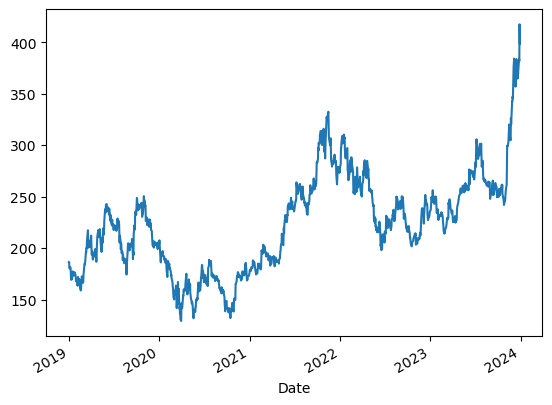

In [35]:
hp['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

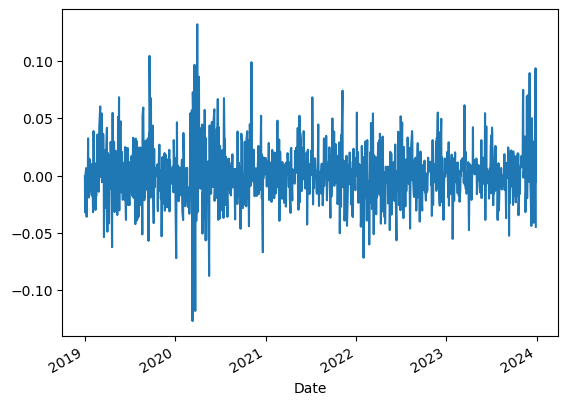

In [36]:
hp['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of HP is in the Uptrend in 2023 ending accordingly the stock returns showing somehow a same pattern. This means the stock returns are predictable.

#### Moving Average

In [37]:
hp['mov_avg'] = hp['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

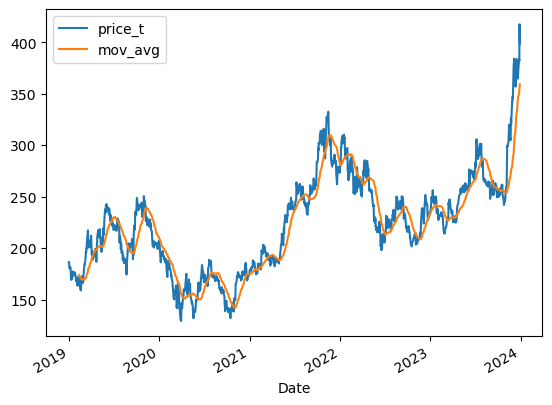

In [38]:
hp[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [39]:
hp['Log_Ret'] = np.log(hp['price_t'] / hp['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
hp['volatility'] = hp['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

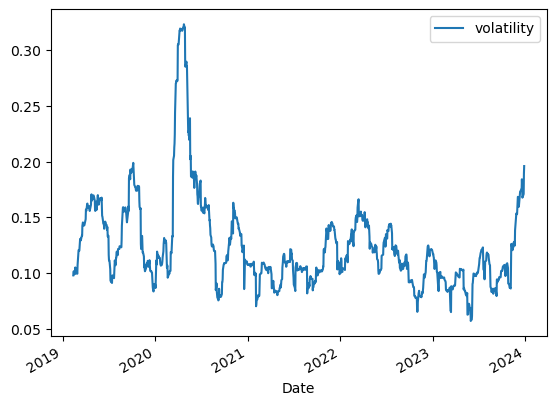

In [40]:
hp[['volatility']].plot()

#### RSI (30-day)

In [41]:
change = hp["price_t"].diff()
change.dropna(inplace=True)

In [42]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

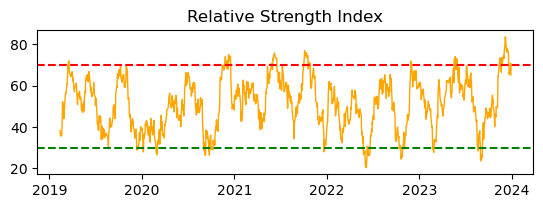

In [43]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## BPCL

#### Loading Desired Data from Yahoo Finance¶.

In [44]:
bpcl = yf.download('BPCL.NS', start="2019-01-01", end="2023-12-30")
bpcl.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,361.049988,369.299988,360.000000,367.200012,262.844696,1552711
2019-01-02,366.000000,366.000000,346.750000,357.950012,256.223541,9862795
2019-01-03,352.000000,354.799988,348.149994,352.500000,252.322357,4986130
2019-01-04,351.799988,361.700012,351.500000,359.450012,257.297211,3858610
2019-01-07,360.000000,362.799988,354.000000,355.549988,254.505539,2895410


#### Cleaning Process.

In [45]:
bpcl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [46]:
bpcl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,386.487247,391.779717,380.695829,385.902064,328.036107,6.622706e+06
std,55.291266,55.854436,54.572763,54.971293,45.416324,7.696110e+06
min,252.600006,276.950012,252.000000,262.850006,209.973175,0.000000e+00
25%,345.000000,349.100006,339.699997,344.700012,294.283859,3.280140e+06
50%,377.000000,381.750000,371.000000,375.649994,328.910919,5.012177e+06
75%,422.500000,429.300003,416.175003,420.699997,359.636383,7.748716e+06
max,549.000000,549.000000,524.599976,544.599976,465.799988,1.997910e+08


In [47]:
bpcl.rename(columns={"Adj Close": "price_t"}, inplace=True)
bpcl.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,361.049988,369.299988,360.000000,367.200012,262.844696,1552711
2019-01-02,366.000000,366.000000,346.750000,357.950012,256.223541,9862795
2019-01-03,352.000000,354.799988,348.149994,352.500000,252.322357,4986130
2019-01-04,351.799988,361.700012,351.500000,359.450012,257.297211,3858610
2019-01-07,360.000000,362.799988,354.000000,355.549988,254.505539,2895410


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [48]:
bpcl['daily_returns']=bpcl["price_t"].pct_change()
bpcl

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,361.049988,369.299988,360.000000,367.200012,262.844696,1552711,NaN
2019-01-02,366.000000,366.000000,346.750000,357.950012,256.223541,9862795,-0.025190
2019-01-03,352.000000,354.799988,348.149994,352.500000,252.322357,4986130,-0.015226
2019-01-04,351.799988,361.700012,351.500000,359.450012,257.297211,3858610,0.019716
2019-01-07,360.000000,362.799988,354.000000,355.549988,254.505539,2895410,-0.010850
...,...,...,...,...,...,...,...
2023-12-22,449.700012,453.350006,445.049988,446.649994,446.649994,5779632,-0.006451
2023-12-26,448.000000,456.500000,444.500000,451.600006,451.600006,11488225,0.011083
2023-12-27,453.950012,456.399994,448.299988,454.700012,454.700012,6199044,0.006864


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

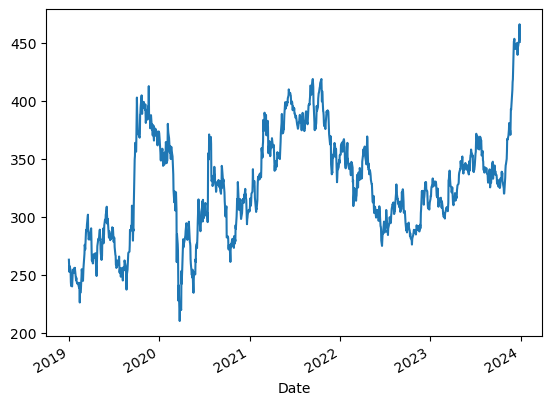

In [49]:
bpcl['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

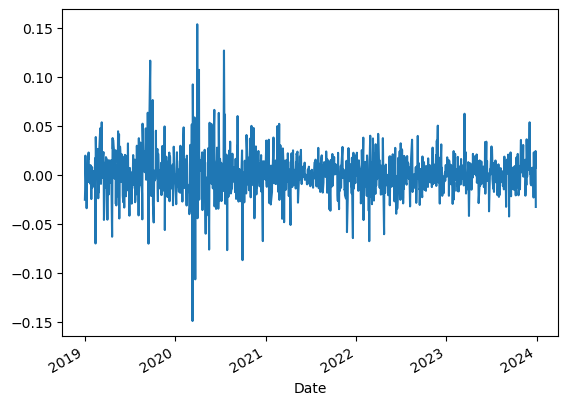

In [50]:
bpcl['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of BPCL is in the Uptrend in 2023 ending but the stock returns just show a random walk pattern. This means sometims the stock returns are unpredictable.

#### Moving Average

In [51]:
bpcl['mov_avg'] = bpcl['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

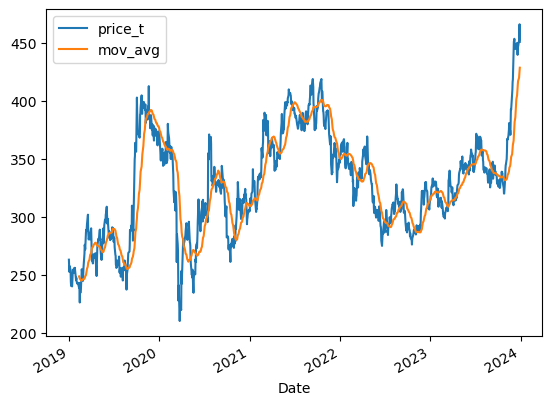

In [52]:
bpcl[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [53]:
bpcl['Log_Ret'] = np.log(bpcl['price_t'] / bpcl['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
bpcl['volatility'] = bpcl['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

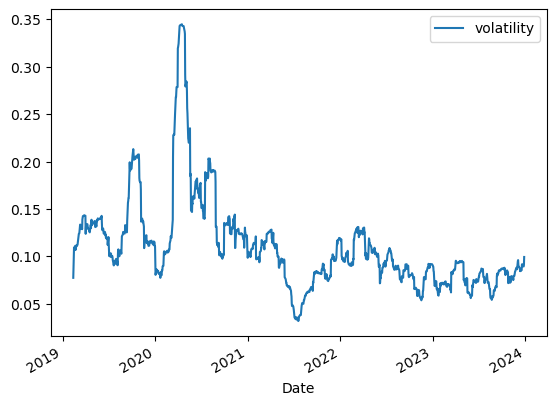

In [54]:
bpcl[['volatility']].plot()

#### RSI (30-day)

In [55]:
change = bpcl["price_t"].diff()
change.dropna(inplace=True)

In [56]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

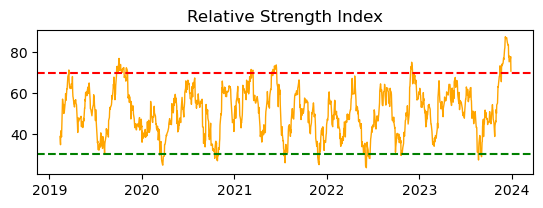

In [57]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## ONGC

#### Loading Desired Data from Yahoo Finance.

In [58]:
ongc = yf.download('ONGC.NS', start="2019-01-01", end="2023-12-30")
ongc.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,150.000000,150.100006,148.000000,148.500000,106.713089,4496586
2019-01-02,148.000000,148.350006,145.750000,147.050003,105.671120,17436694
2019-01-03,145.000000,145.649994,141.600006,142.399994,102.329582,26599483
2019-01-04,142.050003,146.199997,142.050003,145.699997,104.700974,7395898
2019-01-07,147.550003,148.399994,145.750000,147.850006,106.246010,12700566


#### Cleaning Process.

In [59]:
ongc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [60]:
ongc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,133.845587,135.655344,131.875223,133.640162,114.411739,1.933205e+07
std,34.085110,34.242649,33.871744,34.054430,35.948207,1.768215e+07
min,59.400002,63.000000,50.000000,60.000000,45.265781,0.000000e+00
25%,113.474998,115.224998,111.350002,112.849998,91.345783,9.362039e+06
50%,138.550003,140.800003,137.000000,138.750000,114.263611,1.430098e+07
75%,159.150002,160.924995,156.800003,158.900002,139.780586,2.288193e+07
max,209.500000,212.000000,205.350006,208.300003,208.300003,1.780948e+08


In [61]:
ongc.rename(columns={"Adj Close": "price_t"}, inplace=True)
ongc.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,150.000000,150.100006,148.000000,148.500000,106.713089,4496586
2019-01-02,148.000000,148.350006,145.750000,147.050003,105.671120,17436694
2019-01-03,145.000000,145.649994,141.600006,142.399994,102.329582,26599483
2019-01-04,142.050003,146.199997,142.050003,145.699997,104.700974,7395898
2019-01-07,147.550003,148.399994,145.750000,147.850006,106.246010,12700566


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [62]:
ongc['daily_returns']=ongc["price_t"].pct_change()
ongc

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,150.000000,150.100006,148.000000,148.500000,106.713089,4496586,NaN
2019-01-02,148.000000,148.350006,145.750000,147.050003,105.671120,17436694,-0.009764
2019-01-03,145.000000,145.649994,141.600006,142.399994,102.329582,26599483,-0.031622
2019-01-04,142.050003,146.199997,142.050003,145.699997,104.700974,7395898,0.023174
2019-01-07,147.550003,148.399994,145.750000,147.850006,106.246010,12700566,0.014757
...,...,...,...,...,...,...,...
2023-12-22,204.000000,204.500000,201.800003,203.949997,203.949997,9910694,0.006415
2023-12-26,204.500000,208.500000,203.649994,207.350006,207.350006,17052969,0.016671
2023-12-27,209.500000,209.899994,204.500000,205.550003,205.550003,20361303,-0.008681


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

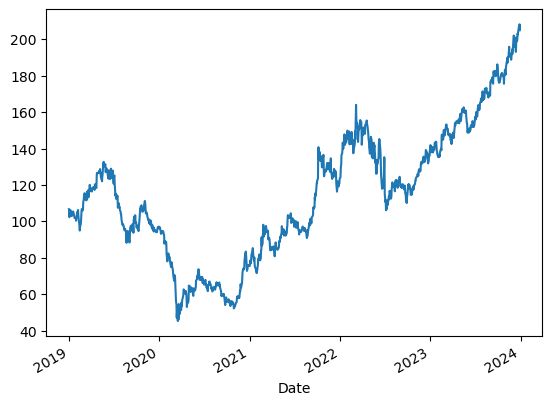

In [63]:
ongc['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

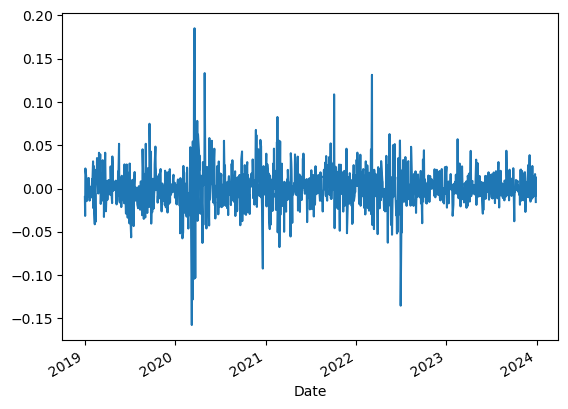

In [64]:
ongc['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of ONGC is in the Downtrend in early 2020 accordingly the stock show same moving pattern. This means we can stock predict the stock returns.

#### Moving Average

In [65]:
ongc['mov_avg'] = ongc['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

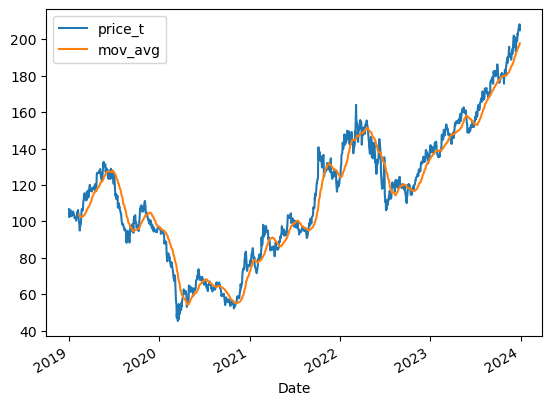

In [66]:
ongc[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [67]:
ongc['Log_Ret'] = np.log(ongc['price_t'] / ongc['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
ongc['volatility'] = ongc['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

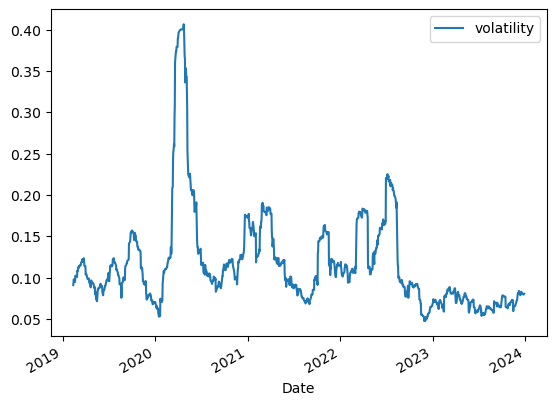

In [68]:
ongc[['volatility']].plot()

#### RSI (30-day)

In [69]:
change = ongc["price_t"].diff()
change.dropna(inplace=True)

In [70]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

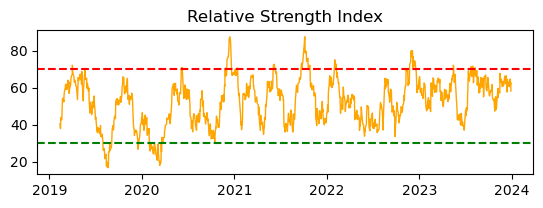

In [71]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')

# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Correlation Matrix Between Stocks and Indices.

In [72]:
tkr = ['RELIANCE.NS','BPCL.NS','IOC.NS','ONGC.NS','HINDPETRO.NS','^NSEI','^NSEBANK']
oil = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')


[*********************100%%**********************]  7 of 7 completed


In [73]:
close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = oil[i]['Adj Close']

### compute the correlation matrix

In [74]:
corr_matrix = close_prices.corr()
corr_matrix

,RELIANCE.NS,BPCL.NS,IOC.NS,ONGC.NS,HINDPETRO.NS,^NSEI,^NSEBANK
RELIANCE.NS,1.000000,0.425651,0.408363,0.539543,0.587554,0.873182,0.718049
BPCL.NS,0.425651,1.000000,0.367625,0.292237,0.637410,0.498195,0.461345
IOC.NS,0.408363,0.367625,1.000000,0.948913,0.852466,0.719358,0.799867
ONGC.NS,0.539543,0.292237,0.948913,1.000000,0.823828,0.806159,0.854945
HINDPETRO.NS,0.587554,0.637410,0.852466,0.823828,1.000000,0.799729,0.787131
^NSEI,0.873182,0.498195,0.719358,0.806159,0.799729,1.000000,0.951029
^NSEBANK,0.718049,0.461345,0.799867,0.854945,0.787131,0.951029,1.000000


### create a heatmap of the correlation matrix using Seaborn

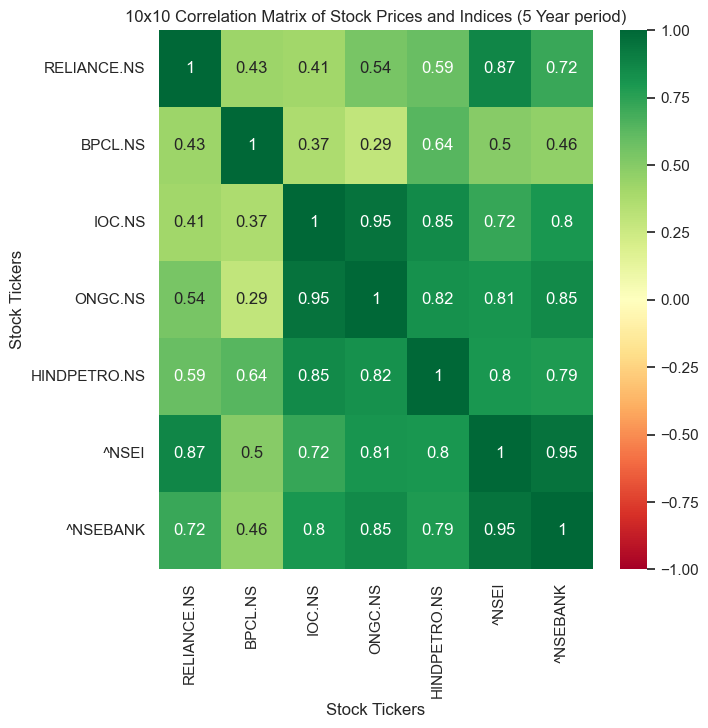

In [75]:
sn.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sn.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

###  Sector-wise Analysis

In [76]:
# Define a list of stock tickers representing each sector
tickers = ['RELIANCE.NS', 'HINDPETRO.NS', 'BPCL.NS','IOC.NS','ONGC.NS']

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each stocks
data = get_stock_data(tickers)

# Check the retrieved data
print("Data:")
print(data.head())

# Continue with the rest of the analysis...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data:
            RELIANCE.NS  HINDPETRO.NS     BPCL.NS     IOC.NS     ONGC.NS
Date                                                                    
2019-01-01  1089.558228    186.722885  262.844696  63.430412  106.713089
2019-01-02  1075.367676    186.613739  256.223541  63.223133  105.671120
2019-01-03  1062.100586    180.612717  252.322357  61.104176  102.329582
2019-01-04  1067.835083    180.539978  257.297211  61.703007  104.700974
2019-01-07  1073.763916    181.703827  254.505539  61.472691  106.246010


In [77]:
# Define a list of stock tickers representing each sector
tickers = ['RELIANCE.NS', 'HINDPETRO.NS', 'BPCL.NS','IOC.NS','ONGC.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: RELIANCE.NS, Laggard: BPCL.NS


### Time Series Analysis

#### Trend Analysis

## RELIANCE

[*********************100%%**********************]  1 of 1 completed


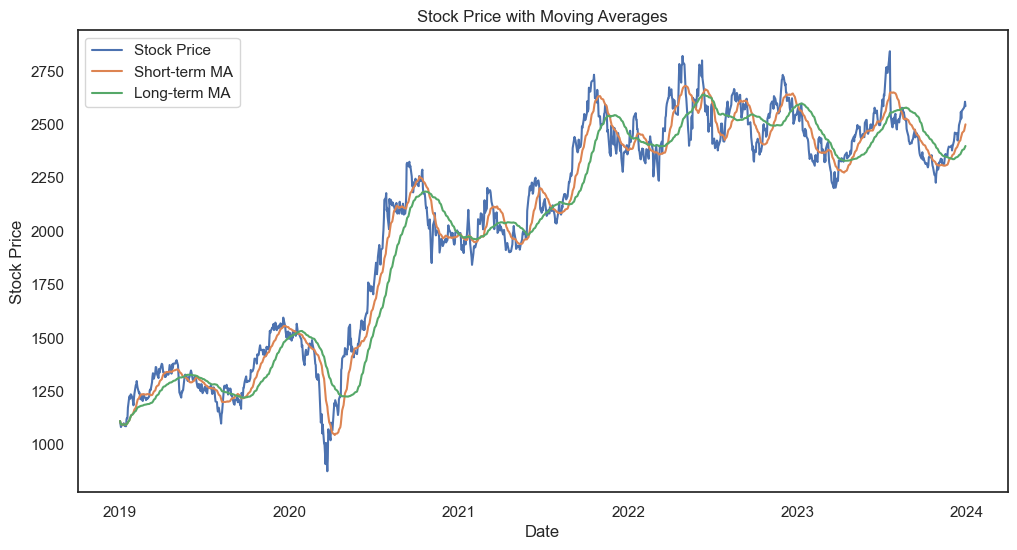

In [78]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'RELIANCE.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## IOC

[*********************100%%**********************]  1 of 1 completed


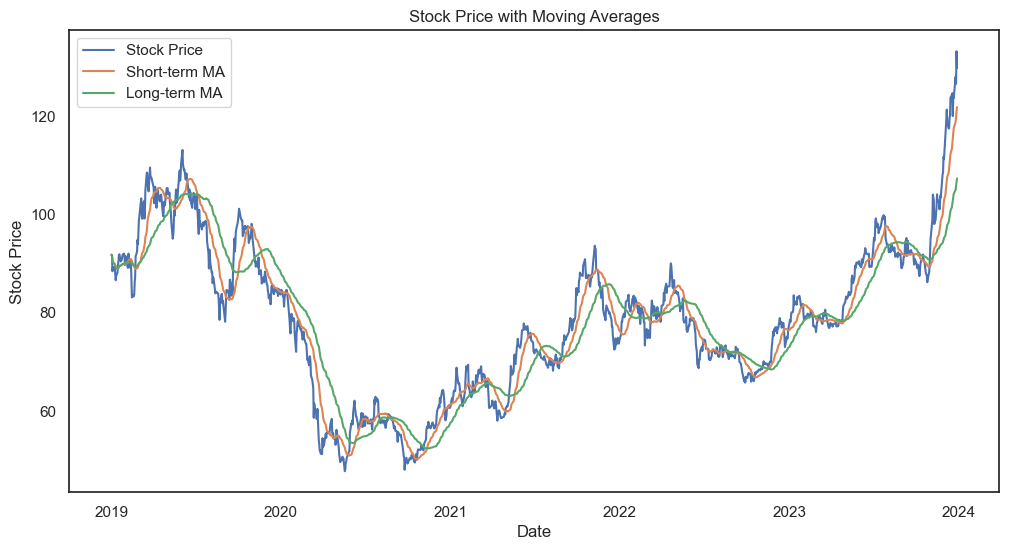

In [79]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'IOC.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## Hindustan Petroleum

[*********************100%%**********************]  1 of 1 completed


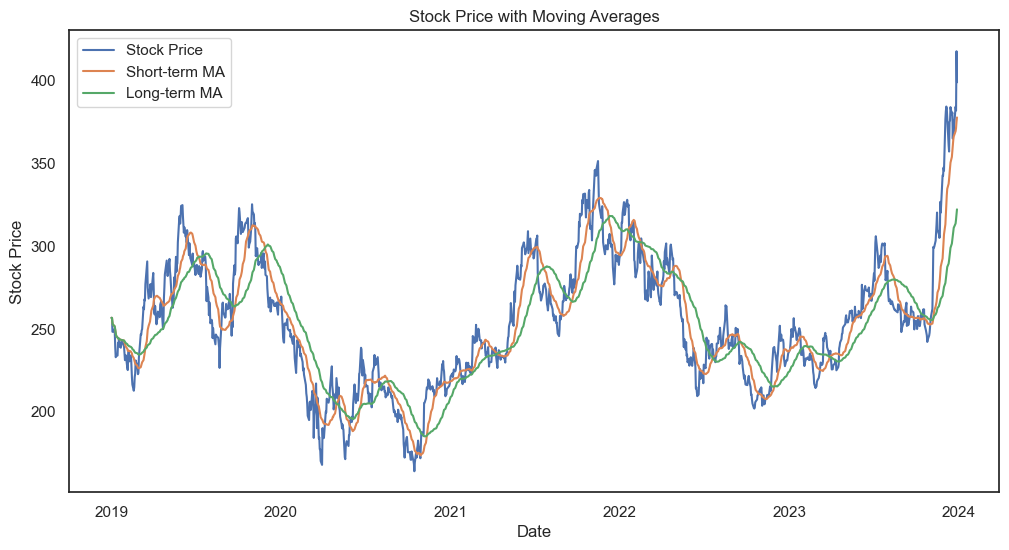

In [80]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'HINDPETRO.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## BPCL

[*********************100%%**********************]  1 of 1 completed


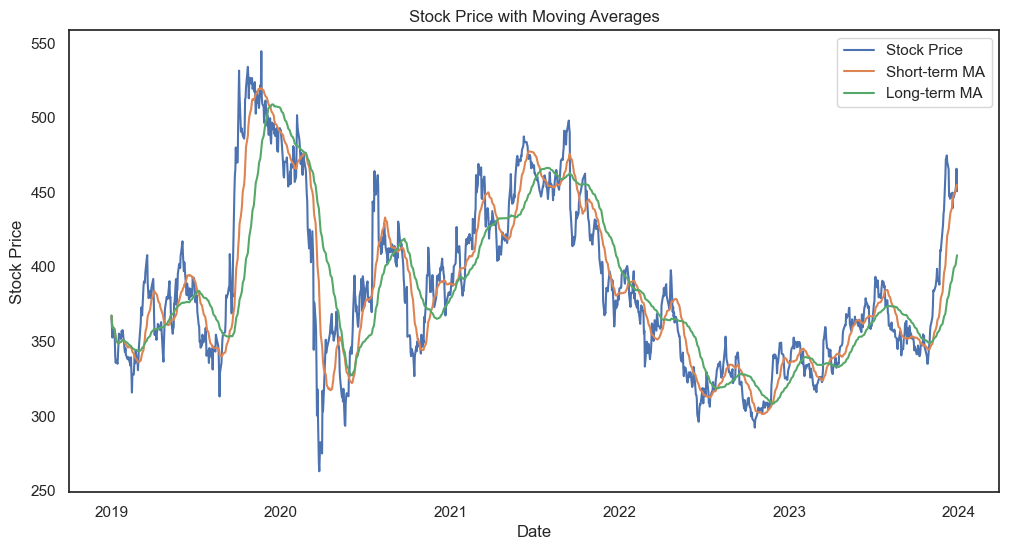

In [81]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'BPCL.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

## ONGC

[*********************100%%**********************]  1 of 1 completed


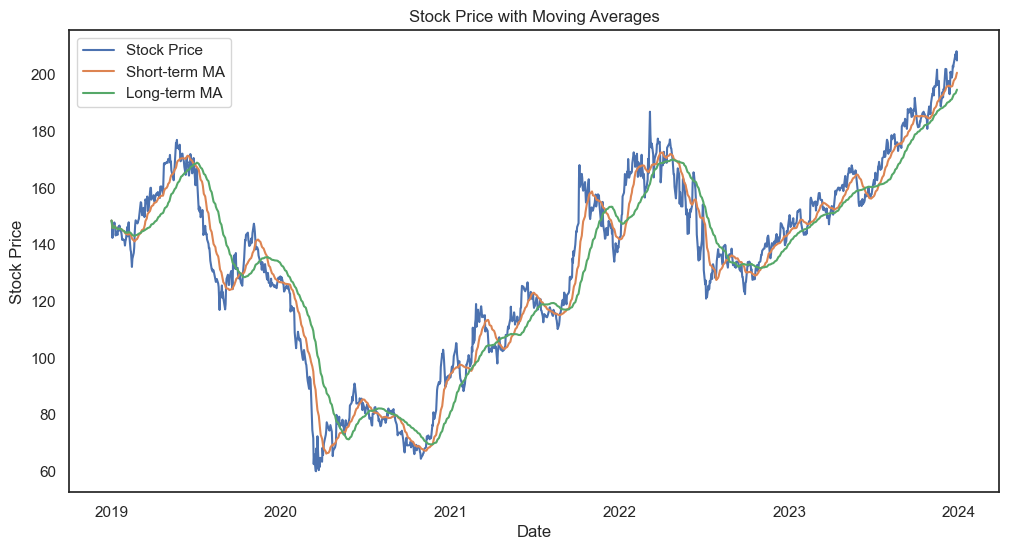

In [82]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'ONGC.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


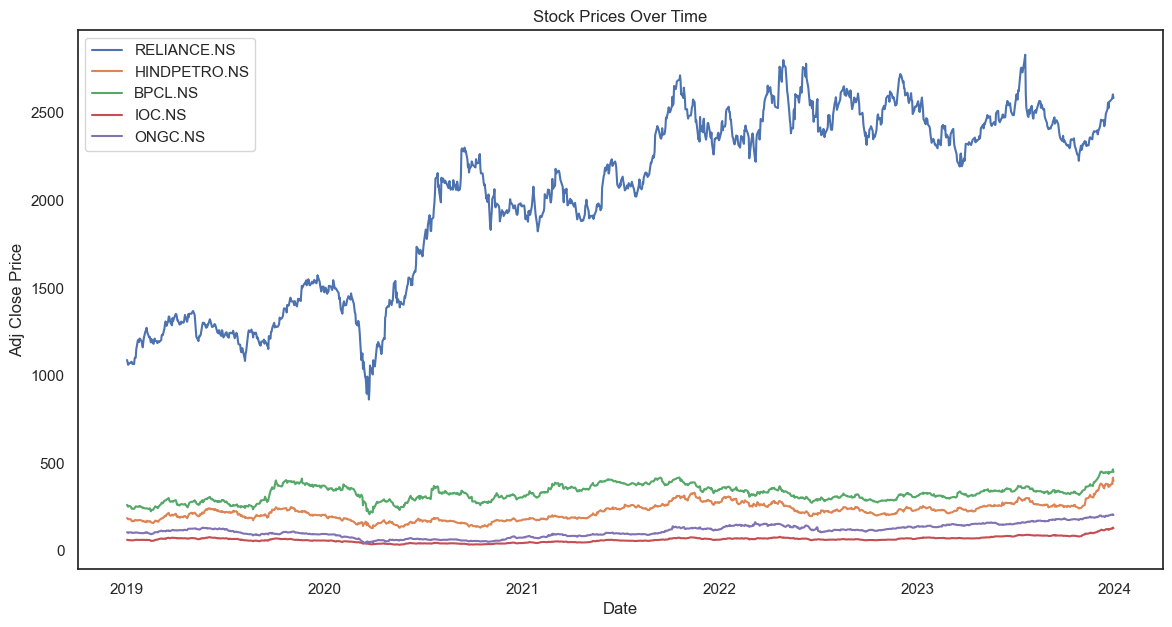

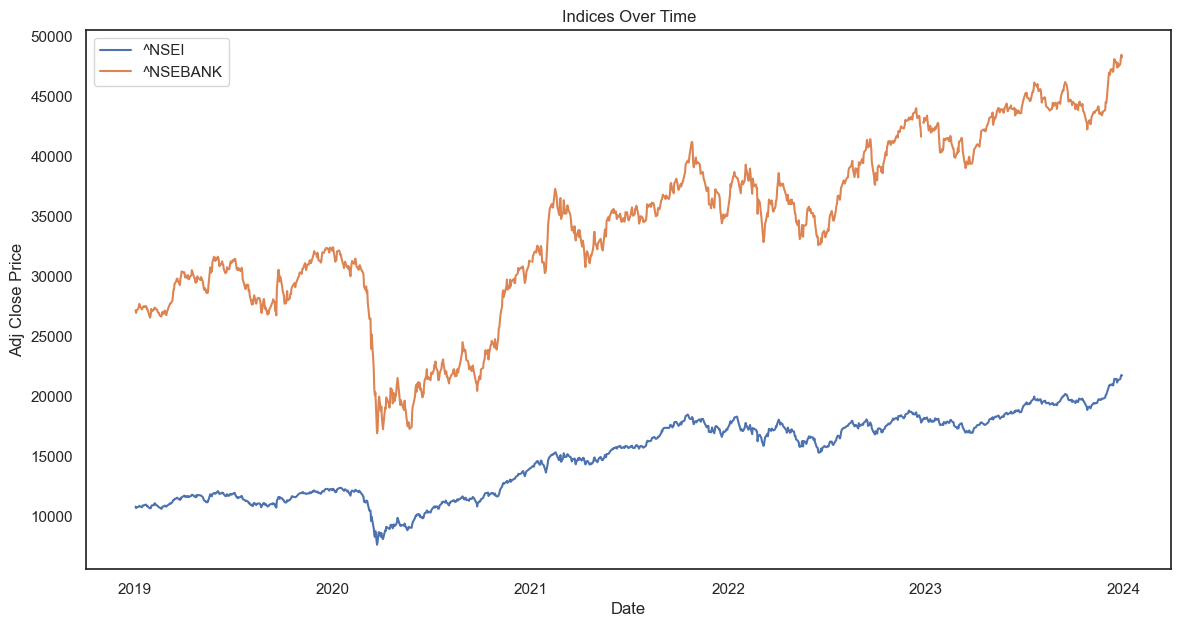

In [83]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['RELIANCE.NS', 'HINDPETRO.NS', 'BPCL.NS','IOC.NS','ONGC.NS']  # Example stock symbols
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


#### Volatility Analysis

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


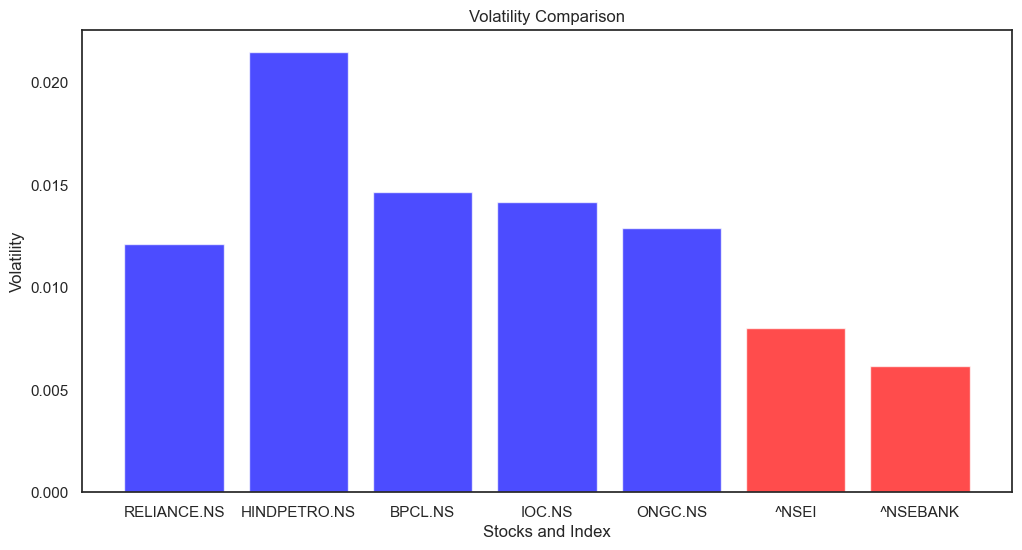

Stock Volatilities:
RELIANCE.NS     0.012107
HINDPETRO.NS    0.021493
BPCL.NS         0.014649
IOC.NS          0.014182
ONGC.NS         0.012912
dtype: float64

Index Volatility:
^NSEBANK    0.00804
^NSEI       0.00619
dtype: float64


In [97]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['RELIANCE.NS', 'HINDPETRO.NS', 'BPCL.NS','IOC.NS','ONGC.NS']
index_ticker = '^NSEI','^NSEBANK'  

# Define the date range for historical data
start_date = '2023-01-01'
end_date = '2023-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)

#### Seasonal Patterns

### RELIANCE

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  1114.683960  1116.714722  1099.676147  1110.473877  1089.558228   
2019-01-02  1104.034912  1116.417480  1090.661621  1096.010864  1075.367676   
2019-01-03  1097.100586  1104.133911  1079.864014  1082.489136  1062.100586   
2019-01-04  1087.095459  1094.079224  1070.948486  1088.333740  1067.835083   
2019-01-07  1096.605225  1107.947754  1090.661621  1094.376465  1073.763916   

             Volume  
Date                 
2019-01-01  4498087  
2019-01-02  7212697  
2019-01-03  7517041  
2019-01-04  8545382  
2019-01-07  5565822  


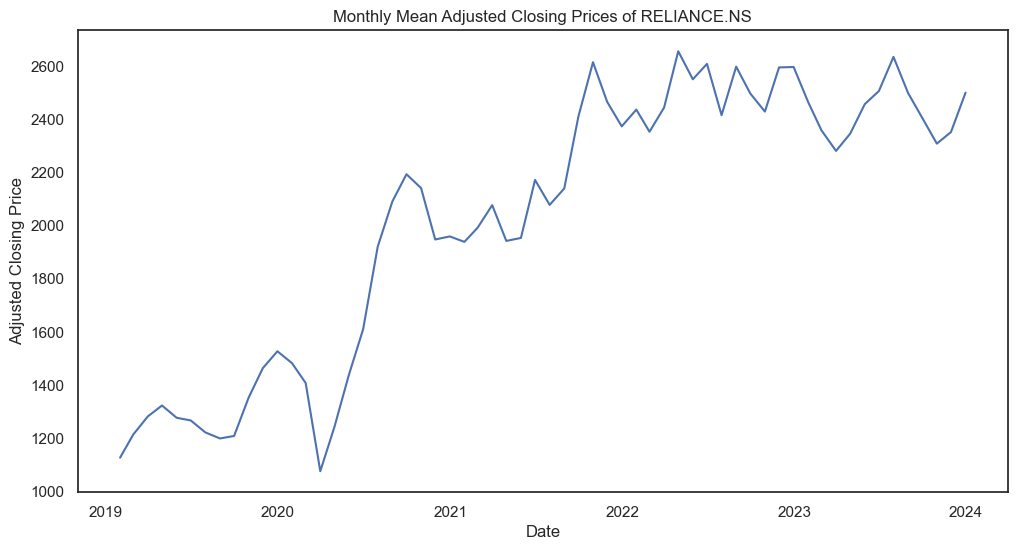

In [85]:
# Define the stock symbol and the time period
stock_symbol = "RELIANCE.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### IOC

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-01  91.466667  92.000000  90.866669  91.800003  63.430412   6088843
2019-01-02  91.533333  92.133331  89.400002  91.500000  63.223133  17264659
2019-01-03  91.466667  91.466667  88.099998  88.433334  61.104176  19588744
2019-01-04  88.433334  89.966667  88.333336  89.300003  61.703007  10915804
2019-01-07  89.666664  89.833336  88.333336  88.966667  61.472691  15935205


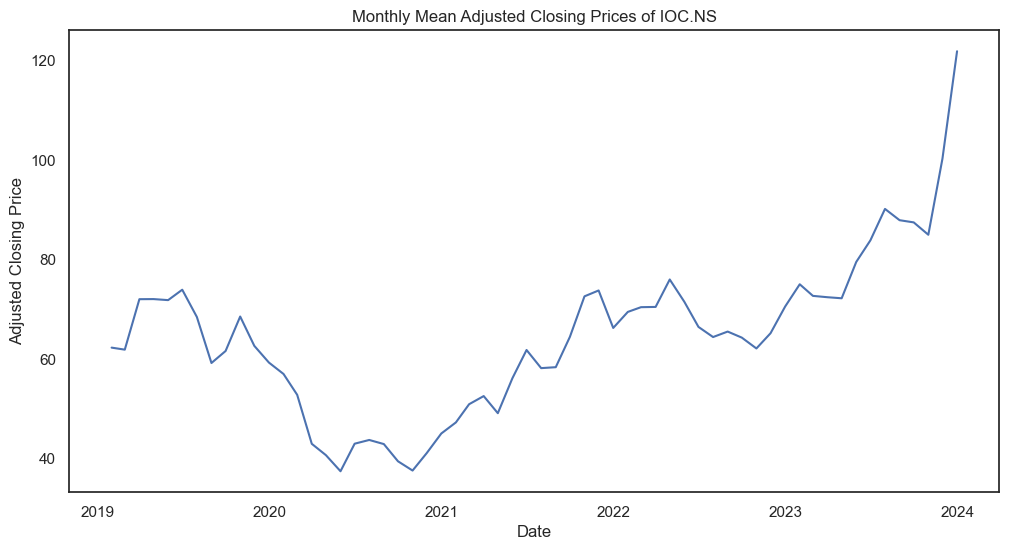

In [86]:
# Define the stock symbol and the time period
stock_symbol = "IOC.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### Hindustan Petrolum

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  253.600006  258.350006  252.500000  256.700012  186.722885   
2019-01-02  255.850006  258.500000  244.699997  256.549988  186.613739   
2019-01-03  253.300003  253.899994  247.199997  248.300003  180.612717   
2019-01-04  247.000000  251.250000  246.350006  248.199997  180.539978   
2019-01-07  249.000000  251.899994  248.149994  249.800003  181.703827   

              Volume  
Date                  
2019-01-01   2829660  
2019-01-02  10666940  
2019-01-03   7019279  
2019-01-04   5576677  
2019-01-07   2274016  


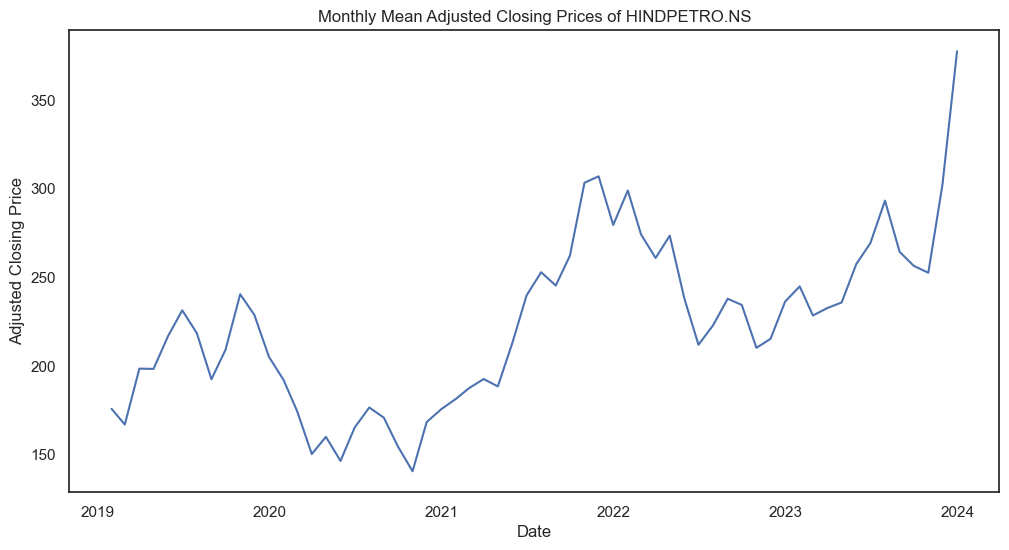

In [87]:
# Define the stock symbol and the time period
stock_symbol = "HINDPETRO.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### BPCL

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  361.049988  369.299988  360.000000  367.200012  262.844696   
2019-01-02  366.000000  366.000000  346.750000  357.950012  256.223541   
2019-01-03  352.000000  354.799988  348.149994  352.500000  252.322357   
2019-01-04  351.799988  361.700012  351.500000  359.450012  257.297211   
2019-01-07  360.000000  362.799988  354.000000  355.549988  254.505539   

             Volume  
Date                 
2019-01-01  1552711  
2019-01-02  9862795  
2019-01-03  4986130  
2019-01-04  3858610  
2019-01-07  2895410  


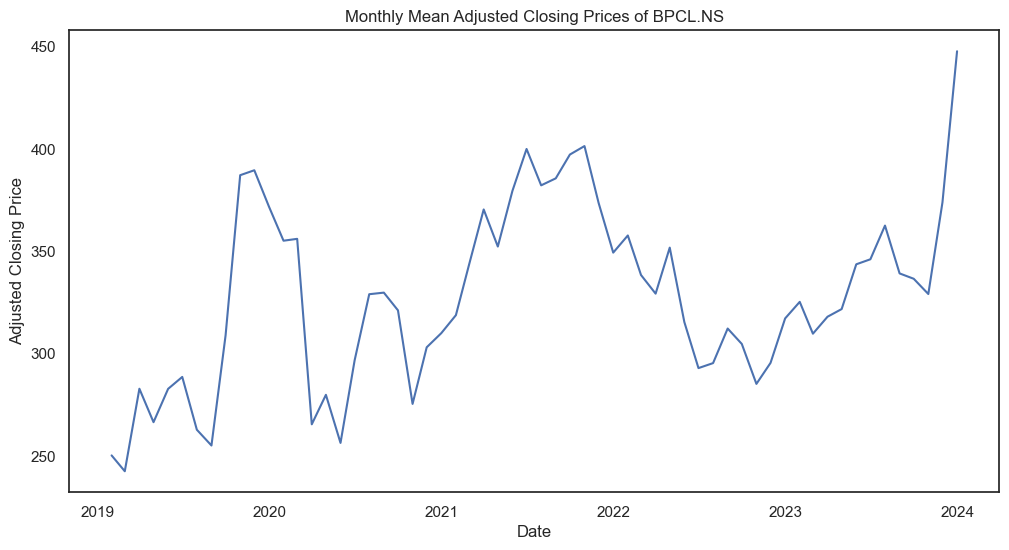

In [88]:
# Define the stock symbol and the time period
stock_symbol = "BPCL.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### ONGC

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  150.000000  150.100006  148.000000  148.500000  106.713089   
2019-01-02  148.000000  148.350006  145.750000  147.050003  105.671120   
2019-01-03  145.000000  145.649994  141.600006  142.399994  102.329582   
2019-01-04  142.050003  146.199997  142.050003  145.699997  104.700974   
2019-01-07  147.550003  148.399994  145.750000  147.850006  106.246010   

              Volume  
Date                  
2019-01-01   4496586  
2019-01-02  17436694  
2019-01-03  26599483  
2019-01-04   7395898  
2019-01-07  12700566  


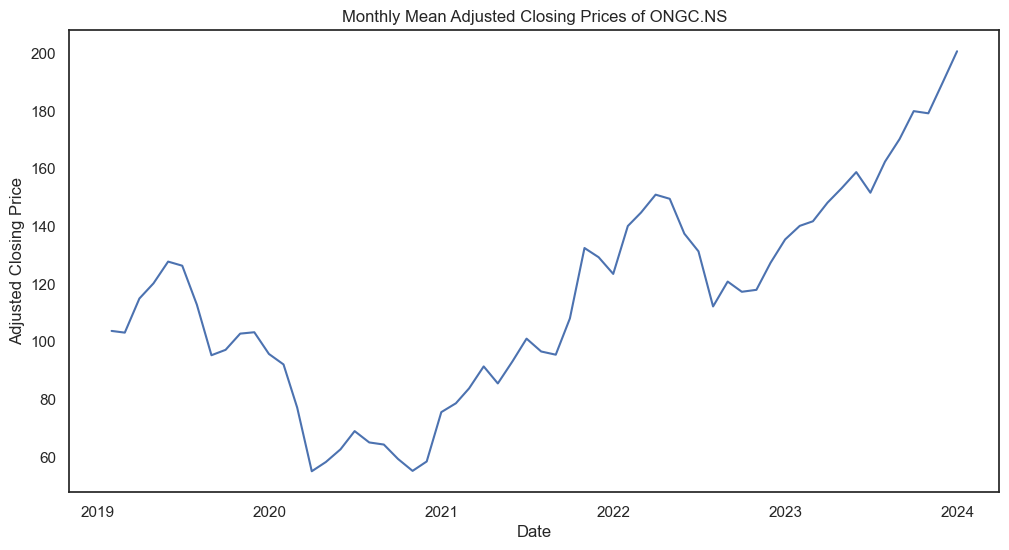

In [89]:
# Define the stock symbol and the time period
stock_symbol = "ONGC.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### Fundamental Analysis

In [90]:
# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(stock_data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(stock_tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)

Financial Ratios:
              Return on Equity (ROE)  Return on Assets (ROA)  \
RELIANCE.NS                      NaN                0.000100   
HINDPETRO.NS                     NaN                0.000907   
BPCL.NS                          NaN                0.000619   
IOC.NS                           NaN                0.003151   
ONGC.NS                          NaN                0.001776   

              Debt to Equity Ratio  
RELIANCE.NS              -0.065760  
HINDPETRO.NS             -0.463466  
BPCL.NS                  -0.523611  
IOC.NS                   -1.480541  
ONGC.NS                  -1.000000  


In [91]:
# List of stock tickers for the companies you want to analyze
sector_tickers = {'Oil & Gas':  ['RELIANCE.NS', 'HINDPETRO.NS', 'BPCL.NS','IOC.NS','ONGC.NS'], 'Insurance': ['HDFCLIFE.NS','ICICIGI.NS','LICI.NS','ICICIPRULI.NS','SBILIFE.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison

    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(stock_tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)

Comparison of Ratios:
           RELIANCE.NS  HINDPETRO.NS   BPCL.NS    IOC.NS   ONGC.NS  Oil & Gas  \
Open          0.132619      0.132619  0.132619  0.132619  0.132619  -0.152010   
High          0.148712      0.148712  0.148712  0.148712  0.148712  -0.146260   
Low           0.132339      0.132339  0.132339  0.132339  0.132339  -0.146173   
Close         0.138162      0.138162  0.138162  0.138162  0.138162  -0.145231   
Adj Close     0.203173      0.203173  0.203173  0.203173  0.203173  -0.265017   
Volume             inf           inf       inf       inf       inf        inf   

           Insurance  
Open       -0.152010  
High       -0.146260  
Low        -0.146173  
Close      -0.145231  
Adj Close  -0.265017  
Volume           inf  
